In [1]:
import numpy as np
import pandas as pd
import torchvision
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [3]:
data = np.loadtxt("./lienard_intermittency.dat")
train = data[:, 1][:45000]
test =  data[:, 1][45000:]

mean = train.mean()
std = train.std()
#sigmastest = np.abs(test - mean)
train_norm = (train - mean)/std
test_norm = (test - mean)/std

In [6]:
X = train_norm[:-1]
Y = train_norm[1:]

In [27]:
W = np.random.uniform(-1, 1, 100)
b = np.random.uniform(-1, 1, 100)

In [43]:
np.vstack((1,u,h))[:,0].shape

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 2 has size 100

In [49]:
h.resize((100, 1))

AttributeError: 'NoneType' object has no attribute 'shape'

In [51]:
h.shape

(100, 1)

In [52]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
H = np.ones((102, 44999))
for i in range(44999):
    u = train_norm[i]
    h = sigmoid(W*u +b)
    h.resize((100, 1))
    H[:,i] = np.vstack((1,u,h))[:,0]

In [53]:
H.shape

(102, 44999)

In [22]:
#B = H@np.linalg.inv(H.T@H+ 0.001*np.eye(44999))@Y

MemoryError: Unable to allocate 15.1 GiB for an array with shape (44999, 44999) and data type float64

In [54]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1e-7)
reg.fit(H.T, Y)

Ridge(alpha=1e-08)

In [59]:
pred = []
for i in range(4999):
    u = test_norm[i]
    h = sigmoid(W*u +b)
    h.resize((100, 1))
    pred.append(reg.predict(np.vstack((1,u,h))[:,0].reshape((1, 102))))

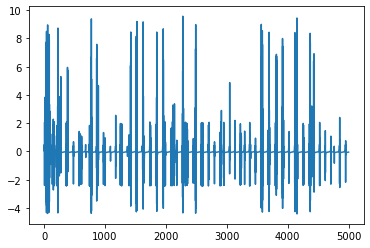

In [62]:
plt.plot(test_norm)

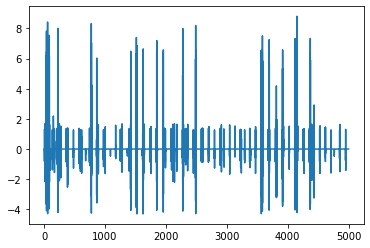

In [63]:
plt.plot(pred)

In [64]:
(((test_norm[1:] - pred)**2).mean())**0.5

1.4578069028140168